In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('landpric.csv')
df.head()

,Area,Distance,Crime Rate,Price
0,89.0,4.0,3.84,7.0
1,66.0,1.0,3.19,5.4
2,78.0,3.0,3.78,6.6
3,111.0,6.0,3.89,7.4
4,44.0,1.0,3.57,4.8


In [4]:
landpric = df.dropna()
landpric.head()

,Area,Distance,Crime Rate,Price
0,89.0,4.0,3.84,7.0
1,66.0,1.0,3.19,5.4
2,78.0,3.0,3.78,6.6
3,111.0,6.0,3.89,7.4
4,44.0,1.0,3.57,4.8


In [5]:
x = landpric.iloc[0:,0:3].values
y = landpric.iloc[0:,3].values

In [6]:
print(x)

[[ 89.     4.     3.84]
 [ 66.     1.     3.19]
 [ 78.     3.     3.78]
 [111.     6.     3.89]
 [ 44.     1.     3.57]
 [ 77.     3.     3.57]
 [ 80.     3.     3.03]
 [ 66.     2.     3.51]
 [109.     5.     3.54]
 [ 75.     3.     3.25]
 [ 85.     2.     3.31]
 [110.     6.     3.2 ]
 [ 45.     1.     3.7 ]
 [ 79.     1.     3.21]
 [ 90.     4.     3.87]
 [ 76.     2.     3.56]
 [ 81.     3.     3.21]]


In [7]:
print(y)

[7.  5.4 6.6 7.4 4.8 6.4 7.  5.6 7.3 6.4 6.9 7.3 4.8 6.8 7.  6.5 7. ]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.20,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [12]:
pred_y_te = model.predict(test_x)

In [13]:
pred_y_te

array([6.10789175, 6.41846512, 7.71693453, 6.15054943])

In [14]:
from sklearn.metrics import r2_score

In [15]:
pred_y_te = model.predict(test_x)
r_square = r2_score(test_y,pred_y_te)

In [16]:
r_square

0.48974920941654065

In [17]:
import numpy as np

In [18]:
value = np.array([[89,4,3.84]])
pred_y_tem = model.predict(value)

In [19]:
pred_y_tem

array([6.81632989])

## Improving Model accuracy

In [20]:
landpric.head()

,Area,Distance,Crime Rate,Price
0,89.0,4.0,3.84,7.0
1,66.0,1.0,3.19,5.4
2,78.0,3.0,3.78,6.6
3,111.0,6.0,3.89,7.4
4,44.0,1.0,3.57,4.8


## Removing CrimeRate and finding MLR

In [21]:
x_ar_ds = landpric.iloc[0:,0:2].values
y_pr = landpric.iloc[0:,3].values

In [23]:
x_ar_ds

array([[ 89.,   4.],
       [ 66.,   1.],
       [ 78.,   3.],
       [111.,   6.],
       [ 44.,   1.],
       [ 77.,   3.],
       [ 80.,   3.],
       [ 66.,   2.],
       [109.,   5.],
       [ 75.,   3.],
       [ 85.,   2.],
       [110.,   6.],
       [ 45.,   1.],
       [ 79.,   1.],
       [ 90.,   4.],
       [ 76.,   2.],
       [ 81.,   3.]])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_x,test_x,train_y,test_y = train_test_split(x_ar_ds,y_pr,test_size=0.20,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model1 = LinearRegression()
model1.fit(train_x,train_y)

LinearRegression()

In [28]:
pred_y_tr = model1.predict(train_x)

In [29]:
pred_y_tr

array([6.89300562, 4.86228899, 6.37569275, 6.84229225, 7.01148227,
       5.90909324, 6.54975417, 7.54340936, 7.60142984, 6.78427178,
       6.31767227, 6.48929799, 4.92030946])

In [30]:
pred_y_te = model1.predict(test_x)

In [31]:
pred_y_te

array([6.13873944, 6.4917337 , 7.71503508, 6.20163132])

In [32]:
from sklearn.metrics import r2_score

In [33]:
pred_y_te = model1.predict(test_x)
r_sqare = r2_score(test_y,pred_y_te)

In [34]:
r_sqare

0.518066502210865

In [35]:
pred_y_tr = model1.predict(train_x)
r_sqare = r2_score(train_y,pred_y_tr)

In [36]:
r_sqare

0.9374281119275392

From this model a slightly increase in "r_sqare" but it is not very good,Beacuse still we have the "MULTI COLINIARITY" problem.
when multi colinearity occure when we are including variables that are highly corelated each other.
This causes some serious problem to our data set.So we need to keep only one variable either "Area" or "Distance".
Which is corelated to "Price"

## Area vs Price

In [37]:
landpric.head()

,Area,Distance,Crime Rate,Price
0,89.0,4.0,3.84,7.0
1,66.0,1.0,3.19,5.4
2,78.0,3.0,3.78,6.6
3,111.0,6.0,3.89,7.4
4,44.0,1.0,3.57,4.8


In [38]:
x_ar = landpric.iloc[0:,0].values.reshape(-1,1)
y_pr = landpric.iloc[0:,3].values.reshape(-1,1)

In [39]:
x_ar

array([[ 89.],
       [ 66.],
       [ 78.],
       [111.],
       [ 44.],
       [ 77.],
       [ 80.],
       [ 66.],
       [109.],
       [ 75.],
       [ 85.],
       [110.],
       [ 45.],
       [ 79.],
       [ 90.],
       [ 76.],
       [ 81.]])

In [40]:
y_pr

array([[7. ],
       [5.4],
       [6.6],
       [7.4],
       [4.8],
       [6.4],
       [7. ],
       [5.6],
       [7.3],
       [6.4],
       [6.9],
       [7.3],
       [4.8],
       [6.8],
       [7. ],
       [6.5],
       [7. ]])

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
train_x,test_x,train_y,test_y = train_test_split(x_ar,y_pr,test_size=0.20,random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regressor = LinearRegression()
regressor.fit(train_x,train_y)

LinearRegression()

In [46]:
pred_y_te = regressor.predict(test_x)

In [47]:
pred_y_te

array([[5.92482324],
       [6.49755255],
       [7.6839204 ],
       [6.29300637]])

In [48]:
from sklearn.metrics import r2_score

In [49]:
r_score = r2_score(test_y,pred_y_te)

In [50]:
r_score

0.674146910014574

In [51]:
value = 89
new_value = np.reshape(value,(1,1))
pred_n = regressor.predict(new_value)


In [52]:
pred_n

array([[6.86573568]])

In [53]:
new = np.array([[89]])
pred = regressor.predict(new)

In [54]:
pred

array([[6.86573568]])

In [55]:
import matplotlib.pyplot as plt

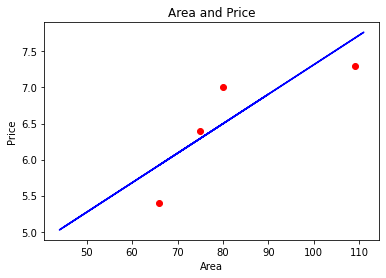

In [56]:
plt.scatter(test_x,test_y,color ='red')
plt.plot(train_x,regressor.predict(train_x),color = 'blue')
plt.title("Area and Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()